Импортируем необходимые библиотеки и загружаем данные.

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import ttest_ind

In [119]:
control_group = pd.read_csv('control_group.csv',sep=';')
test_group = pd.read_csv('test_group.csv',sep=';')

In [120]:
control_group.head(2)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0


In [121]:
test_group.head(2)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677


Посчитаем CAC – стоимость привлечения клиента - для контрольной и тестовой групп.

In [123]:
control_group['CAC'] = control_group['Spend [USD]']/control_group['# of Purchase']
test_group['CAC'] = test_group['Spend [USD]']/test_group['# of Purchase']

In [124]:
control_group['CAC'].mean()

5.052338662510724

In [125]:
test_group['CAC'].mean()

5.899589404475941

Видим, что CAC в тестовой группе увеличился, что уменьшит прибыль. Необходимо проверить, является ли данное изменение статистически значимым.
Посмотрим на распределения CAC.

<Axes: xlabel='CAC', ylabel='Count'>

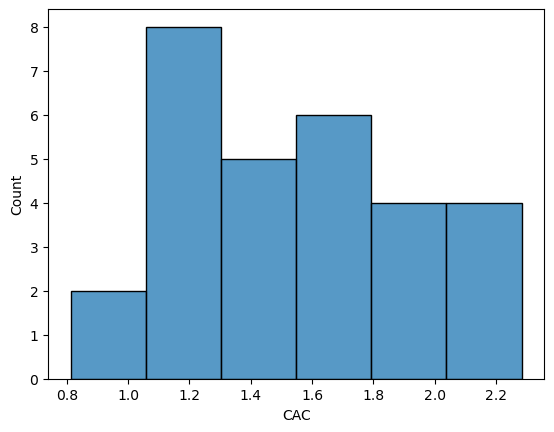

In [127]:
sns.histplot(np.log(control_group['CAC'].dropna())) # Логарифмируем распределение САС в контрольной группе, чтобы добиться нормального распределения.

<Axes: xlabel='CAC', ylabel='Count'>

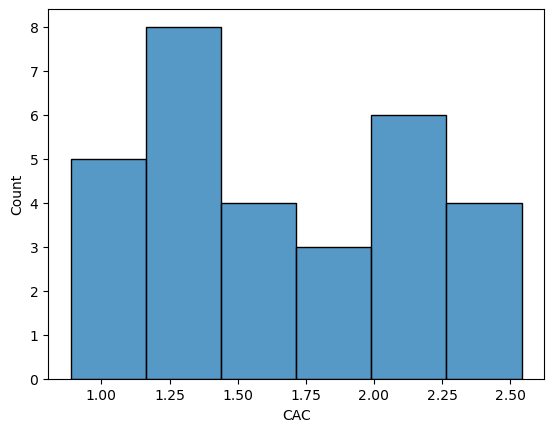

In [128]:
sns.histplot(np.log(test_group['CAC'].dropna())) # Логарифмируем распределение САС в тестовой группе, чтобы добиться нормального распределения.

Проверим распределения на нормальность с помощью теста Шапиро.

In [130]:
shapiro(np.log(control_group['CAC'].dropna()))

ShapiroResult(statistic=0.9627324442070977, pvalue=0.38307846766511583)

In [131]:
shapiro(np.log(test_group['CAC'].dropna()))

ShapiroResult(statistic=0.9515990686028156, pvalue=0.1865512874341121)

Поскольку в обоих случаях P-value больше 0.05, то распределения нормальны. Можно использовать t-тест. Нулевая гипотеза: среднее значение САС в контрольной и тестовой группах не отличаются.

In [133]:
ttest_ind(np.log(control_group['CAC'].dropna()), np.log(test_group['CAC'].dropna()))

TtestResult(statistic=-1.185322572235202, pvalue=0.24080815318507603, df=57.0)

P-value=0.24080815318507603 > 0.05, значит нельзя отклонить нулевую гипотезу. Следовательно, изменение САС не является статистически значимым.

Посмотрим теперь на конверсию просмотра в покупку.

In [136]:
control_group['CR_view_to_purchase'] = control_group['# of Purchase']/control_group['# of Impressions']
test_group['CR_view_to_purchase'] = test_group['# of Purchase']/test_group['# of Impressions']

In [137]:
control_group['CR_view_to_purchase'].mean()

0.005000838685705587

In [138]:
test_group['CR_view_to_purchase'].mean()

0.008425206515806645

Видим, что конверсия в покупку увеличилась в тестовой группе. Проверим, является ли изменение статистически значимым.

<Axes: xlabel='CR_view_to_purchase', ylabel='Count'>

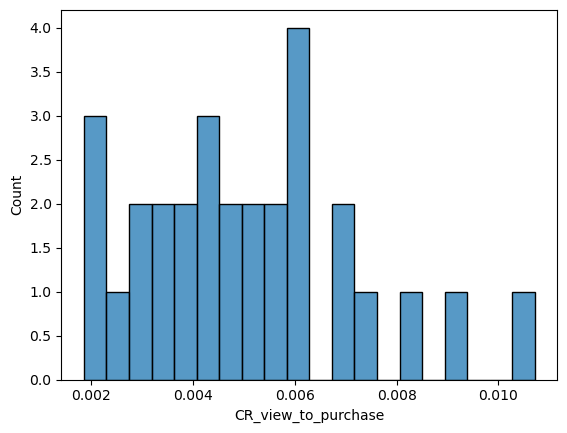

In [140]:
sns.histplot(control_group['CR_view_to_purchase'], bins=20)

<Axes: xlabel='CR_view_to_purchase', ylabel='Count'>

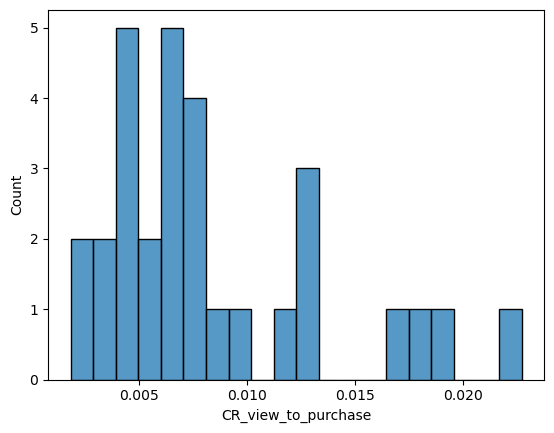

In [141]:
sns.histplot(test_group['CR_view_to_purchase'], bins=20)

In [142]:
shapiro(test_group['CR_view_to_purchase'].dropna())

ShapiroResult(statistic=0.8838476002711686, pvalue=0.0034594715637168527)

In [143]:
shapiro(control_group['CR_view_to_purchase'].dropna())

ShapiroResult(statistic=0.9573368197700145, pvalue=0.28217276932475105)

Распределение конверсии в тестовой группе не является нормальным. Поэтому лучше воспользоваться критерием Манна-Уитни.
Нулевая гипотеза: вероятность случайно взять из первой выборки более высокое значение, чем из второй, равна 50%

In [145]:
mannwhitneyu(control_group['CR_view_to_purchase'].dropna(), test_group['CR_view_to_purchase'])

MannwhitneyuResult(statistic=245.0, pvalue=0.00406347614003368)

P-value<0.05, значит можно отвергнуть нулевую гипотезу. Следовательно, увеличение СR статистически значимо.

Итак, мы обнаружили статистически значимое увеличение CR просмотра в покупку и незначительное увеличение САС. Значит, изменения можно считать положительными и тестовую компанию успешной.